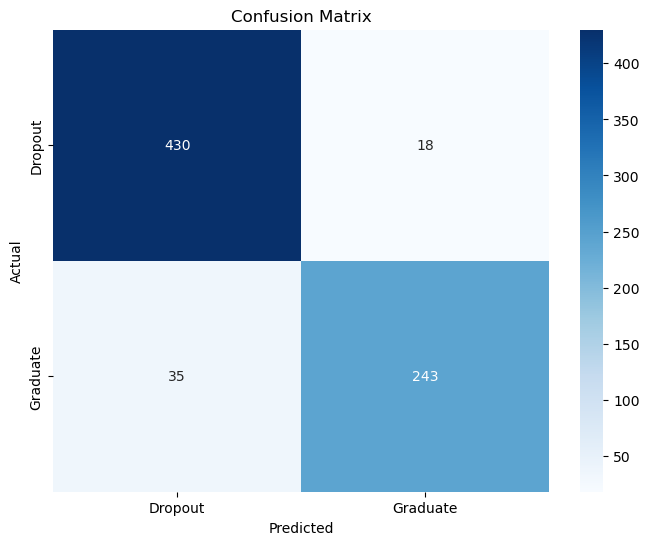

Classification Report:
               precision    recall  f1-score   support

     Dropout       0.92      0.96      0.94       448
    Graduate       0.93      0.87      0.90       278

    accuracy                           0.93       726
   macro avg       0.93      0.92      0.92       726
weighted avg       0.93      0.93      0.93       726



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "C:/Users/HP/OneDrive - Edge Hill University/Edgehill/Research Project/Report/predict+students+dropout+and+academic+success (4)/data.csv"

# Load the dataset with semicolon separator
dataset = pd.read_csv(file_path, sep=';')
dataset['Target'].value_counts()
dataset['Target'] = LabelEncoder().fit_transform(dataset['Target'])
dataset['Target'].value_counts()


# Remove "Enrolled" students and focus on "Graduate" and "Dropout" only
dataset = dataset[dataset['Target'] != 1]

# Create 'Dropout' column (1 for dropout, 0 for graduate)
dataset['Dropout'] = dataset['Target'].apply(lambda x: 1 if x == 0 else 0)

# Standard Scaling the data
x = dataset.iloc[:, :36].values
scaler = StandardScaler()
x = scaler.fit_transform(x)

y = dataset['Dropout'].values

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Load the trained stacking model
stacking_model = joblib.load('student_risk_model.pkl')

# Get predictions
y_pred = stacking_model.predict(x_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dropout', 'Graduate'], yticklabels=['Dropout', 'Graduate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Dropout', 'Graduate'])
print("Classification Report:\n", report)